In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [205]:
housing_df = pd.read_csv('Housing.csv')
housing_df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [206]:
housing_df.shape

(545, 13)

In [207]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [208]:
housing_df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

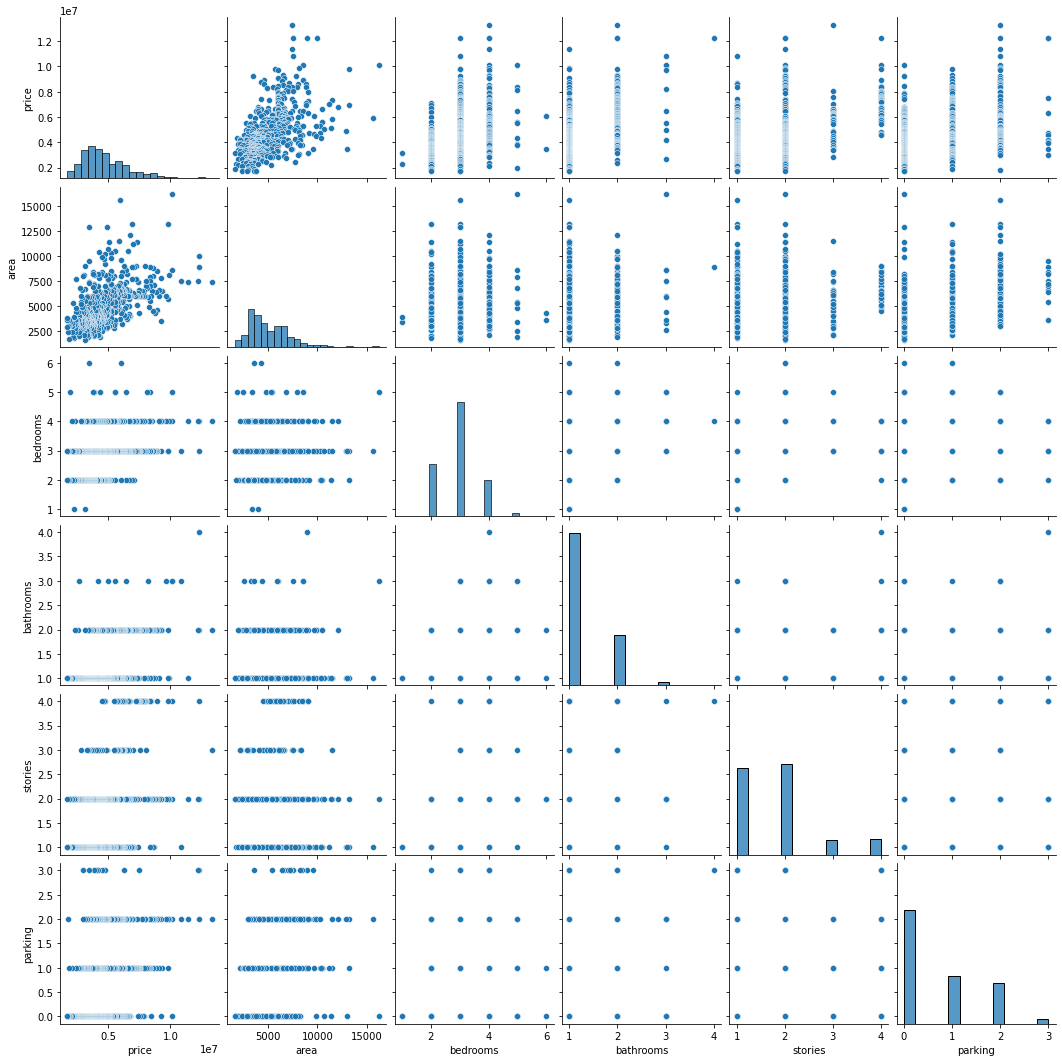

In [209]:
sns.pairplot(housing_df)
plt.show()

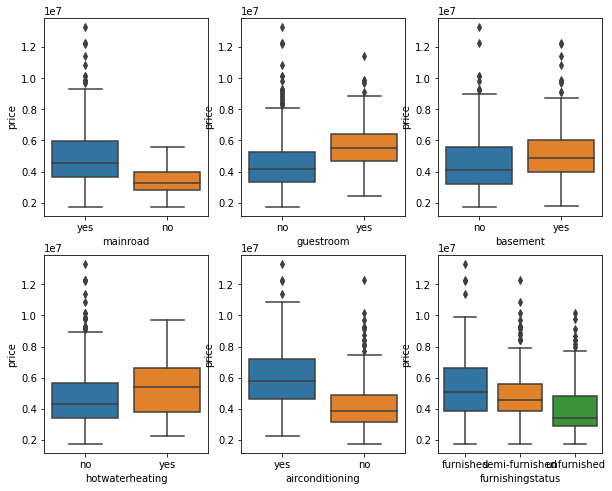

In [212]:
# visualize categorical variable
plt.figure(figsize=(10, 8))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing_df)

plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing_df)

plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing_df)

plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing_df)

plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing_df)

plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing_df)

plt.show()


# Prepare data for modeling
- Encoding:
    - convert binary vars to 1 and 0
    - Other categorical vars to dummy vars


In [213]:
# yes no variables
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [214]:
# convert yes and no 1 and zero
housing_df[varlist] = housing_df[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [215]:
housing_df[varlist].head()

mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
0         1          0         0                0                1         1
1         1          0         0                0                1         0
2         1          0         1                0                0         1
3         1          0         1                0                1         1
4         1          1         1                0                1         0

In [216]:
housing_df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

### Dummy variables

In [217]:
# Create dummy variables for furnishing status
status = pd.get_dummies(housing_df['furnishingstatus'])
status.head()

furnished  semi-furnished  unfurnished
0          1               0            0
1          1               0            0
2          0               1            0
3          1               0            0
4          1               0            0

In [218]:
# we do not need three columns, we can make 00 as furnished, 01 and unfurnished and 10 as semi furnished
# Create dummy variables for furnishing status
status = pd.get_dummies(housing_df['furnishingstatus'], drop_first=True)
status.head()

semi-furnished  unfurnished
0               0            0
1               0            0
2               1            0
3               0            0
4               0            0

In [219]:
# add this to the original df
housing_df = pd.concat([housing_df, status], axis=1)

In [220]:
housing_df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  semi-furnished  unfurnished  
0        furnished               0            0  
1        furnished               0            0  
2   semi-furnished               1            0  
3        furnished               0            0  
4        furnished               0            0

In [221]:
housing_df = housing_df.drop('furnishingstatus', axis=1)


In [222]:
housing_df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0               0            0  
1               0            0  
2               1            0  
3               0            0  
4               0            0

In [223]:
#Split into train and test and do some rescaling of variables
df_train, df_test = train_test_split(housing_df, train_size = 0.70, random_state = 100)
df_train.shape

(381, 14)

In [105]:
# Rescaling done mainly using 2 methods - Min-Max scaling (also called normalisation - data as 0 and 1) adn standardisarion(get the values mean to zero and sigma to 1)


In [104]:
# Normalisation
# x - xmin / xmax-xmin

# standardisaion
# x-mu(mean) / sigma

In [224]:
# Instantiate class
scaler = MinMaxScaler()

# Fit data
# Create a list of numeric variables - encoded categorical variables doesn't need changing cause we will loose interpretability
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

# sklearn methods
# fit() : computes xmax, xmin
# transform() computes acually the transform
# fit_transform() - one method to both in one step

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [225]:
df_train.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
359  0.169697  0.155227       0.4        0.0  0.000000         1          0   
19   0.615152  0.403379       0.4        0.5  0.333333         1          0   
159  0.321212  0.115628       0.4        0.5  0.000000         1          1   
35   0.548133  0.454417       0.4        0.5  1.000000         1          0   
28   0.575758  0.538015       0.8        0.5  0.333333         1          0   

     basement  hotwaterheating  airconditioning   parking  prefarea  \
359         0                0                0  0.333333         0   
19          0                0                1  0.333333         1   
159         1                0                1  0.000000         0   
35          0                0                1  0.666667         0   
28          1                1                0  0.666667         0   

     semi-furnished  unfurnished  
359               0            1  
19                1            0  
159               0            0  
35                0            0  
28                0            1

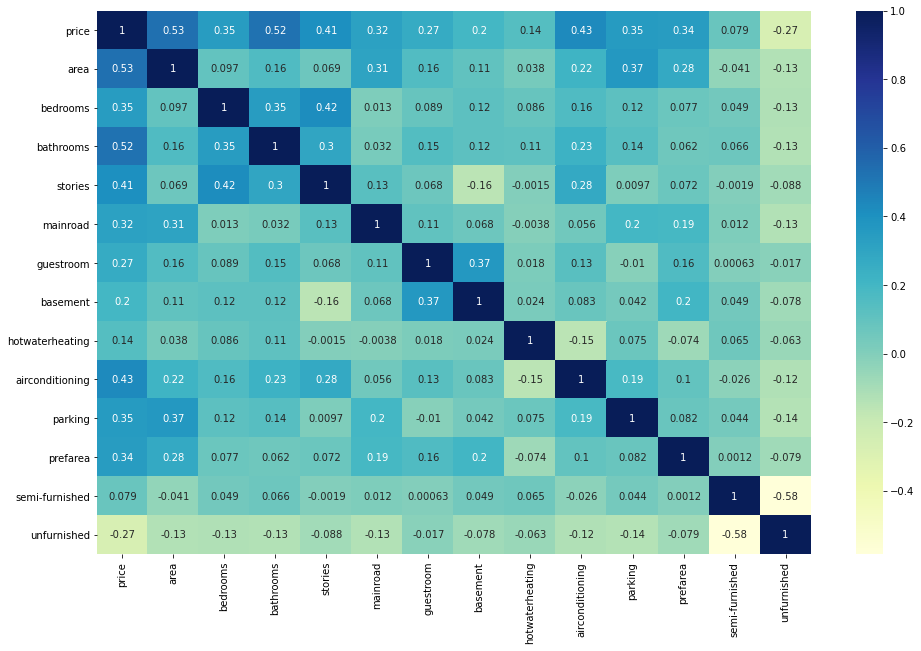

In [226]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [227]:
# Create X_train and Y_train
y_train = df_train.pop('price')
X_train = df_train

In [167]:
# statistical significance of variables
# VIF of variables

In [228]:
# add constant for statsmodel (only take acre since we are trying to construct a model using area)
X_train_sm = sm.add_constant(X_train['area'])

In [229]:
# create first model
lr = sm.OLS(y_train, X_train_sm)

In [230]:
# fit the model
lr_model = lr.fit()

In [231]:
# parameters
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [232]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           3.15e-29
Time:                        22:35:08   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
# add another variable
X_train_sm = X_train[['area', 'bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)

In [234]:
# fit model
lr_model = lr.fit()

In [235]:
# parameters
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [236]:
# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           2.51e-54
Time:                        22:35:18   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
# add another variable
X_train_sm = X_train[['area', 'bathrooms', 'bedrooms']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)

In [238]:
# fit model
# fit model
lr_model = lr.fit()

In [239]:
# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           3.12e-57
Time:                        22:35:37   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
# Now try using all features and then try removing the ones that aren't that significant

In [240]:
housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [241]:
# add constant using all columns and create model
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)

In [242]:
# fit the model
lr_model = lr.fit()

In [243]:
# look at the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           8.83e-83
Time:                        22:35:45   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
# look at the significance - p value - and drop variables that are insignificant, also we can look at VIF

In [245]:
# Compute VIF
VIF_data = pd.DataFrame()
features = X_train
VIF_data['feature'] = features.columns
VIF_data['VIF'] = [variance_inflation_factor(features.values, i) 
                          for i in range(len(features.columns))] 

VIF_data

feature       VIF
0              area  4.672431
1          bedrooms  7.334390
2         bathrooms  1.666512
3           stories  2.701092
4          mainroad  6.021774
5         guestroom  1.469106
6          basement  2.015022
7   hotwaterheating  1.135860
8   airconditioning  1.770847
9           parking  2.122672
10         prefarea  1.507107
11   semi-furnished  2.188172
12      unfurnished  1.822718

We could have  
    - High VIF, high p-value - definitely drop  
    - High-low cases  
        - High p-value, low VIF  - remove this first and see if VIF of the second type changes
        - Low p-Value, High VIF  
    - Low p value, low VIF -- do not drop

In [246]:
# drop semi furnished which has very low statistical significance (high p-value)
X = X_train.drop('semi-furnished', axis = 1)

In [247]:
# Build model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.07e-83
Time:                        22:35:54   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
# Compute VIF
VIF_data = pd.DataFrame()
features = X
VIF_data['feature'] = features.columns
VIF_data['VIF'] = [variance_inflation_factor(features.values, i) 
                          for i in range(len(features.columns))] 

VIF_data

feature       VIF
0              area  4.670442
1          bedrooms  6.587321
2         bathrooms  1.666284
3           stories  2.689344
4          mainroad  5.675433
5         guestroom  1.469081
6          basement  2.011951
7   hotwaterheating  1.135003
8   airconditioning  1.766562
9           parking  2.122636
10         prefarea  1.505338
11      unfurnished  1.396489

In [249]:
# bedrooms have high pvalue and high VIF - dropping it and creating the model again
X = X.drop('bedrooms', axis=1)

In [250]:
# Build model again
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           2.73e-84
Time:                        22:36:05   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
# Compute VIF
VIF_data = pd.DataFrame()
features = X
VIF_data['feature'] = features.columns
VIF_data['VIF'] = [variance_inflation_factor(features.values, i) 
                          for i in range(len(features.columns))] 

VIF_data

feature       VIF
0              area  4.546377
1         bathrooms  1.608652
2           stories  2.225831
3          mainroad  4.791862
4         guestroom  1.463201
5          basement  1.871437
6   hotwaterheating  1.124728
7   airconditioning  1.764774
8           parking  2.103005
9          prefarea  1.504142
10      unfurnished  1.332090

In [252]:
# predict y for the training data
y_train_pred = lr_model.predict(X_train_sm)

In [253]:
# calculate residual
res = y_train - y_train_pred

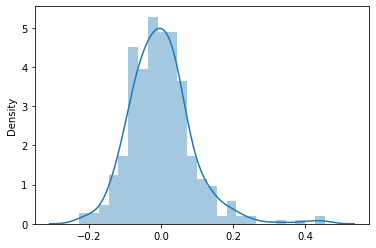

In [254]:
# plot distribution
sns.distplot(res)
plt.show()

In [255]:
# Fit data
# Create a list of numeric variables - encoded categorical variables doesn't need changing cause we will loose interpretability
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

# sklearn methods
# fit() : computes xmax, xmin
# transform() computes acually the transform
# fit_transform() - one method to both in one step

# we will use the scaler object that has learned (fit) the train dataset to transform the test dataset

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [256]:
df_test.describe()
# notice the max values and min values are not zero and 1 because the fit is done on the training data

price        area    bedrooms   bathrooms     stories    mainroad  \
count  164.000000  164.000000  164.000000  164.000000  164.000000  164.000000   
mean     0.263176    0.298548    0.408537    0.158537    0.268293    0.865854   
std      0.172077    0.211922    0.147537    0.281081    0.276007    0.341853   
min      0.006061   -0.016367    0.200000    0.000000    0.000000    0.000000   
25%      0.142424    0.148011    0.400000    0.000000    0.000000    1.000000   
50%      0.226061    0.259724    0.400000    0.000000    0.333333    1.000000   
75%      0.346970    0.397439    0.400000    0.500000    0.333333    1.000000   
max      0.909091    1.263992    0.800000    1.500000    1.000000    1.000000   

        guestroom    basement  hotwaterheating  airconditioning     parking  \
count  164.000000  164.000000       164.000000       164.000000  164.000000   
mean     0.195122    0.347561         0.030488         0.353659    0.205285   
std      0.397508    0.477654         0.172452         0.479569    0.289322   
min      0.000000    0.000000         0.000000         0.000000    0.000000   
25%      0.000000    0.000000         0.000000         0.000000    0.000000   
50%      0.000000    0.000000         0.000000         0.000000    0.000000   
75%      0.000000    1.000000         0.000000         1.000000    0.333333   
max      1.000000    1.000000         1.000000         1.000000    1.000000   

         prefarea  semi-furnished  unfurnished  
count  164.000000      164.000000   164.000000  
mean     0.237805        0.420732     0.329268  
std      0.427043        0.495189     0.471387  
min      0.000000        0.000000     0.000000  
25%      0.000000        0.000000     0.000000  
50%      0.000000        0.000000     0.000000  
75%      0.000000        1.000000     1.000000  
max      1.000000        1.000000     1.000000

In [257]:
y_test = df_test.pop('price')
X_test = df_test

In [258]:
X_test_sm = sm.add_constant(X_test)

In [259]:
# dropping variables that were dropped from the train for model building
X_test_sm = X_test_sm.drop(['bedrooms', 'semi-furnished'], axis=1)

In [260]:
y_test_pred = lr_model.predict(X_test_sm)

In [263]:
# evaluate model by using r2score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.6713505684480789

In [266]:
# Using Recirsive Feature Elimination (RFE) from sklearn - model is also built using sklearn
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [267]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [269]:
# columns selected by RFE
cols = X_train.columns[rfe.support_]

In [270]:
# create training data with RFE selected columns
X_train_rfe = X_train[cols]

In [272]:
# create a model using statsmodels so we can get the summary
X_train_sm = sm.add_constant(X_train_rfe)

In [273]:
# create model
lm = sm.OLS(y_train, X_train_sm).fit()

In [275]:
# summary of the model built using features selected by RFE
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           1.28e-82
Time:                        22:59:51   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
# bedrooms seem insignificant - see p value - will drop it
X_train_new = X_train_sm.drop(['bedrooms'], axis=1)

In [279]:
# create model
lm = sm.OLS(y_train, X_train_new).fit()

In [280]:
# summary of the model built using features selected by RFE
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           6.67e-83
Time:                        23:01:15   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
# Compute VIF just to be sure
VIF_data = pd.DataFrame()
features = X_train_rfe
features = features.drop(['bedrooms'], axis=1)
VIF_data['feature'] = features.columns
VIF_data['VIF'] = [variance_inflation_factor(features.values, i) 
                          for i in range(len(features.columns))] 

VIF_data

feature       VIF
0             area  4.516773
1        bathrooms  1.578669
2          stories  2.120356
3         mainroad  4.263472
4        guestroom  1.300287
5  hotwaterheating  1.121364
6  airconditioning  1.748100
7          parking  2.096114
8         prefarea  1.466057

In [286]:
# Residual analysis
y_pred_train = lm.predict(X_train_rfe)

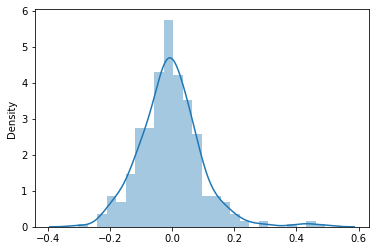

In [289]:
# Residual distribution
res =  y_train - y_pred_train 
sns.distplot(res)
plt.show()

In [291]:
# Analysis on test set
X_test_new = X_test[cols].drop(['bedrooms'], axis=1)

In [292]:
# add constant
X_test_new = sm.add_constant(X_test_new)

In [293]:
# predict
y_test_pred = lm.predict(X_test_new)

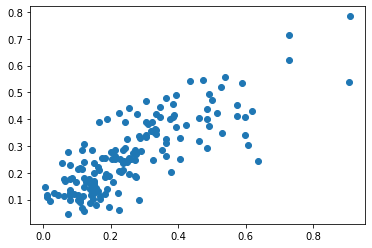

In [294]:
# plot predicted vs actual
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.show()